<h1><center>  Méthode de Stein et théorème central limite </center></h1>
<h2><center>Joshua BENABOU - Houssam EL CHEAIRI</center></h2>
<h3><center>1 juillet 2018</center></h3>

Note: tous les graphes sont en pièces jointes.

# T1
## i 
Le sens $\Leftarrow$ est trivial. Regardons l'autre sens de l'implication,
Pour toute fonction $f \in F$:
$|\mathbb{E}_{\mu}[f] - \mathbb{E}_{\nu}[f]| = 0 $ <br/>
par linéarité : $|\mathbb{E}_\mu[\lambda.f] - \mathbb{E}_\nu[\lambda.f]| = 0$ pour tout $\lambda>0 $.
On peut démontrer que toute fonction indicatrice d'un intérvalle du type $]-\infty,a]$ est limite d'une
suite de fonction de la forme $\lambda.f$ avec $f \in F$ (il suffit d'approcher la fonction indicatrice avec des trapèzes, on aura dans ce cas une suite de fonctions $f_{\epsilon}$ qui vaut $1$ sur $]-\infty,a-\epsilon]$, $0$ sur $[a+\epsilon,+\infty[$, et est affine entre $a-\epsilon$ et $a+\epsilon$), de plus le théorème de convergence dominé nous permet de dire que $\mathbb{E}_\mu[f_\epsilon] \rightarrow \mathbb{E}_\mu[\mathbb{1}_{]-\infty,a]}]$
On en déduit alors que pour tout borélien $A$: <br/>
 $|\mathbb{E}_\mu[\mathbb{1}_A] - \mathbb{E}_\nu[\mathbb{1}_A]| = 0$ i.e $\mu(A) = \nu(A)$ et donc par définition $\mu = \nu$
## ii 
Ce résultat est immédiat étant donné que $|\mathbb{E}_\mu[f] - \mathbb{E}_\nu[f]| = |\mathbb{E}_\nu[f] - \mathbb{E}_\mu[f]|$ pour tout $f \in F$.
### iii 
Pour toute $f \in F$: 
$|\mathbb{E}_\mu[f] - \mathbb{E}_\nu[f]| <= |\mathbb{E}_\mu[f] - \mathbb{E}_\eta[f]| + |\mathbb{E}_\eta[f] - \mathbb{E}_\nu[f]| <= d(\mu,\eta) + d(\eta,\nu)$ par définition de $d(.,.)$
puis en passant au sup à gauche sur l'ensemble $F$:
$d(\mu,\nu)<=d(\mu,\eta)+d(\eta,\nu)$
 

# T2

Pour $f \in F'$,on a pour tout $x \in \mathbb{R}$: $|f'(x)| \le 1$ et donc $|f(x)| \le |f(0)|+|x|$. Ainsi $\mathbb{E}_{\gamma}[f'(X)]$ et $\mathbb{E}_{\gamma}[Xf(X)]$ sont finies et $\mathbb{E}_{\gamma}[f'(X)-Xf(X)]=\mathbb{E}_{\gamma}[f'(X)]-\mathbb{E}_{\gamma}[Xf(X)]$. Une integration par parties donne: 

$$\mathbb{E}_{\gamma}[Xf(X)]=\int_{-\infty}^{+\infty}\frac{1}{\sqrt{2\pi}}xf(x)e^{-x^2/2}dx=[\frac{1}{\sqrt{2\pi}}f(x)e^{-x^2/2} ]_{-\infty}^{+\infty}-\frac{1}{\sqrt{2\pi}}\int_\mathbb{R}-f'(x)e^{-x^2/2} dx=\mathbb{E}_{\gamma}[f'(X)]$$

Ainsi $\mathbb{E}_{\gamma}[f'(X)-Xf(X)]=0$.

# T3
On utilise le lemme énoncé sur l'existence d'une fonction $g_f$ solution de l'équation $(2)$ pour toute fonction $f\in F^{'}$. EN effet soit $f\in F^{'}$, on a alors (en notant $\gamma^{'}$ la loi normale):
$$ 0 = \mathbb{E}_\gamma[{g_f}^{'}(X)-Xg_f(X)] = \mathbb{E}_\gamma[ f(X) - \mathbb{E}_{\gamma^{'}}[f(X)] ] = \mathbb{E}_\gamma[f(X)] - \mathbb{E}_\gamma^{'}[f(X)] $$ et donc par passge au sup  $ d_W(\gamma,\gamma^{'})=0  $ et finalement : $ \gamma = \gamma^{'}$



# S1

D'abord on numérote les différentes fonctions de 1 a 5 (fonction f(i,z)). Pour chaque fonction $f_i$ on calcule $g_{f_i}(z)$ sur l'intervalle $[-5,20]$ d'abord par intégration numérique. 

On a essaye en premier d'intégrer via la méthode des rectangles de premier ordre (fonction rectangles_g), ce qui donne des mauvais résultats sur $R^{-}$:pour chaque fonction, l'approximation tend rapidement vers plus ou moins infini, ce qui est évidemment faux en général, car par exemple pour $f_1(z)=z$, $g_{f_1}(z)=-1$. On voit par exemple que pour $f_3(z)=\sin(z)$, $g_{f_3}(z)$ doit etre paire, or l'approximation n'est paire que pour $z>-3$. 

Ensuite, on a essayé une méthode de quadrature de Gauss de la bibliothèque scipy (fonction gauss_g), qui n'a pas augmenté la qualité de l'approximation. 

Nous pensons que le facteur $e^{z^2/2}$ est responsable pour l'accumulation des erreurs lorsque $z$ tend vers moins infini, et on n'a pas pu résoudre ce problème. Pour la suite, on se restreint donc a $R^{+}$.

Ensuite, on approxime $g_f(z)$ par la méthode Monte-Carlo. On note que 

$$g_f(z)=\sqrt(2\pi)\mathbb{E}[(E_{\gamma}(f)-f(X))\mathbb{1}_{[z,\infty]}]$$

ou $X$ suit une loi $N(0,1)$. Ainsi, on a essayé en premier de moyenner des variables gaussiennes (fonction montecarlo_g), ce qui donne une approximation qui dégrade pour $z>4$. Nous attribuons cela a des erreurs de calcul accumulées du même genre que ci-dessus. Ainsi, on a réessayer en moyennant des variables uniformes sur l'intervalle $[-b,b]$  (fonction montecarlo2_g), on notant que pour $b$ suffisamment grand on a:


$$\int_{z}^{\infty}e^{-\frac{t^2}{2}}(E_{\gamma}(f)-f(t)) dt \approx \int_{-b}^{b}e^{-\frac{t^2}{2}}(E_{\gamma}(f)-f(t)) dt=2b\mathbb{E}[(E_{\gamma}(f)-f(X))\mathbb{1}_{[z,\infty]}]$$

ou $X$ suit la loi uniforme sur $[-b,b]$. Cette fois-ci on obtient une bonne convergence sur l'intervalle $[0,20]$.

Le code ci-dessous génére, pour la fonction $f_i$, un graphe contenant $3$ calculs de $g_f(z)$: un par quadrature de gauss, et deux par Monte-Carlo ($N=1000$, puis $N=100000$ tirages). On observe bien la convergence de l'approximation Monte-Carlo. Le temps de calcul est environ $30$ secondes.

In [2]:
import math
from numpy import inf,linspace,random
from scipy.stats import poisson
from scipy.integrate import quad

import matplotlib.pyplot as plt

def f(i,z):#renvoie f_i(z)
    if i==1: return z
    if i==2: return math.sin(z)
    if i==3: return math.sqrt(1+z**2)
    if i==4: return 1/(1+z**2)
    if i==5: return math.exp(-abs(z))

#---------------------------S1----------------------------------------

def montecarlo_E_gamma(i,n): #estimation de E_gamma(f) via monte-carlo (i=1,2,3,4,5)
    sum=0
    for k in range(n):
        sum+=f(i,random.normal())
    return sum/n
#-----------------------
'''
Calcul de g_f(z) via monte carlo
    i=1,2,3,4,5 numero de la fonction f ;
    n=nombre d'evenements monte-carlo ;
    e=montecarlo_E_gamma(i,1000000)
'''
def montecarlo_g(i,z,n,e):#monte carlo sur des variables gaussiennes 
    sum=0
    for k in range(n):
        x=random.normal()
        if x>=z: sum+=(e-f(i,x))
    return math.sqrt(2*math.pi)*math.exp((z**2)/2)*(sum/n)

def montecarlo2_g(i,z,n,e):#monte carlo sur des variables uniformes, pour avoir une meilleure convergence sur R+
    sum=0
    for k in range(n):
        b=100
        x=random.uniform(-b,b)
        if x>=z: sum+=(e-f(i,x))*math.exp((-x**2)/2)
    return (2*b)*math.exp((z**2)/2)*(sum/n)


def rectangles_g(i,z,pas,zmax,e):#calcul de g_f(z), approximation des rectangles , valable pour z<zmax
    g=0
    for k in range(int((zmax-z)/pas)):
        t=z+k*pas
        g+=pas*math.exp(-(t**2)/2)*(e-f(i,t))
    return math.exp((z**2)/2)*g

def gauss_g(i,z,e):#calcul de g_f(z) via quadrature de Gauss, donne des meilleurs resultats sur R+
     integrand=lambda t: math.exp(-(t**2)/2)*(e-f(i,t))
     return math.exp((z**2)/2)*quad(integrand,z,inf)[0]


import time
start = time.time()
#-------------------------------------------------------------
i=1 #numero de la fonction f que l'on veut approcher
#------------------------------------------------------------
z_coords=linspace(-5,20,100)
e=montecarlo_E_gamma(i,1000000)

y_coords_mc1=[montecarlo2_g(i,z,1000,e) for z in z_coords]#monte carlo sur n=2000 variables
y_coords_mc2=[montecarlo2_g(i,z,100000,e) for z in z_coords]#monte carlo sur n=200000 variables
y_coords_quad=[gauss_g(i,z,e) for z in z_coords]#on compare avec le g

plt.xlabel(r"$z$")
plt.ylabel(r"$g_{f_1}(z)$")
plt.ylim((-2, 2))
plt.plot(z_coords,y_coords_mc1,'b', label='monte carlo n=10^3')
plt.plot(z_coords,y_coords_mc2,'r', label='monte carlo n=10^5')
plt.plot(z_coords,y_coords_quad,'g',label='quadrature de Gauss')
plt.legend()
end = time.time()
print("runtime= "+str((end - start)))

plt.show()


runtime= 13.731269598007202


<Figure size 640x480 with 1 Axes>

# T4
On a 

$$d_W(\gamma_n,\gamma) = \sup_{f \in F'}|\mathbb{E}_{\gamma_n}[f]-\mathbb{E}_{\gamma}[f]|=\sup_{f \in F'}|\mathbb{E}[f(S_n)]-\mathbb{E}_{\gamma}[f]|=\mathbb{E}[g_f'(S_n)-S_ng_f(S_n)]$$

où la dernière égalité découle directement de l'équation de Stein donné et la linéarité de l'espérance.

# T5
Par linéarité de l'espérance, 

On a pour tout $i \le n$, $S_n-S_n^{-i}=\frac{X_i}{\sqrt{n}}$. Ainsi,
\begin{align*}
A&=-\mathbb{E}\bigg[\sum_{i=1}^n \frac{X_i}{\sqrt{n}}\big(g_f(S_n)-g_f(S_n^{-i})-\frac{X_i}{\sqrt{n}}g_f'(S_n)\big)\bigg]\\
A&=-\mathbb{E}\bigg[S_ng_f(S_n)-\sum_{i=1}^n\frac{X_i}{\sqrt{n}}g_f(S_n^{-i})-\sum_{i=1}^n\frac{X_i^2}{n}g_f'(S_n)\bigg]\\
\end{align*}
On a pour tout $i \le n$, par l'indépendance des $X_i$:  $\mathbb{E}\big[\frac{X_i}{\sqrt{n}}g_f(S_n^{-i})\big]=\mathbb{E}\big[X_i\big]\mathbb{E}\big[\frac{g_f(S_n^{-i})}{\sqrt{n}}\big]=0$ car $\mathbb{E}[X_i]=0$ pour tout $i$. Ainsi par linéarité, 

\begin{align*}
A&=-\mathbb{E}\bigg[S_ng_f(S_n)-\sum_{i=1}^n\frac{X_i^2}{n}g_f'(S_n)\bigg]\\
B&=-\mathbb{E}\bigg[\sum_{i=1}^n\frac{X_i^2}{n}g_f'(S_n)-g_f'(S_n)\bigg]\\
A+B&=\mathbb{E}\bigg[g_f'(S_n)-S_ng_f(S_n)\bigg]\\
\end{align*}

# T6
La formule de Taylor nous donne

$$|g_f(S_n)-g_f(S_n^{-i})+(S_n-S_n^{-i})g_f'(S_n)| \le \frac{1}{2}\sup_{\mathbb{R}} |g_f''||S_n-S_n^{-i}|^2=\frac{1}{n}|X_i|^2$$

ou on utilise la majoration du Lemme $\sup_{\mathbb{R}} |g_f''| \le 2$. Par linearité et l'inégalité triangulaire,

$$|A| \le \frac{1}{\sqrt{n}}\sum_{i=1}^n \mathbb{E}[|X_i||g_f(S_n)-g_f(S_n^{-i})+(S_n-S_n^{-i})g_f'(S_n)|]$$

Par croissance de l'éspérance et la première inégalité , on a pour tout $i \le n$:

$$\mathbb{E}[|X_i||g_f(S_n)-g_f(S_n^{-i})+(S_n-S_n^{-i})g_f'(S_n)|] \le \mathbb{E}[\frac{1}{n} |X_i|^3] \le \frac{1}{n}C_3$$

En multipliant par $\frac{1}{\sqrt{n}}$ et en sommant sur les $n$ variables $X_i$ on trouve le résultat final:
 $$|A| \le \frac{1}{\sqrt{n}}C_3$$

# T7
Notons d'abord que $S_n - {S_n}^{-i} = \frac{X_i}{\sqrt{n}}$ .On a d'après cauchy shwartz:
$$|B|^2 \le \frac{1}{n^2} \mathbb{E}[(\Sigma (X_i ^2-1))^2]\mathbb{E}[{{g_f}^{'}}^2]\le\frac{1}{n^2} \mathbb{E}[(\Sigma (X_i ^2-1))^2]\frac{2}{\pi}$$

et:
$$ \mathbb{E}[(\Sigma (X_i ^2-1))^2] = \mathbb{E}[(\Sigma X_i^2 -n)^2]=\mathbb{E}[\Sigma X_i^4 + n^2 -2n\Sigma X_i^2 + \Sigma_{i<>j}X_i^2X_j^2]$$
or $$\mathbb{E}[-2n\Sigma X_i^2] = -2n^2$$
et : $$\mathbb{E}[\Sigma_{i<>j}X_i^2X_j^2]= n(n-1)$$
donc:
$$ \mathbb{E}[(\Sigma (X_i ^2-1))^2] = nC_4 + n^2 -2n^2 + n(n-1) = nC_4 -n \le nC_4$$
finalement:
$$|B|^2 \le \frac{1}{n^2}nC_4 \frac{2}{\pi} $$
de plus $$1=\mathbb{E}[X_i^2]\le \sqrt{\mathbb{E}[X_i^4]\mathbb{E}[1]}=\sqrt{C_4}$$
ainsi : $C_4\le C_4^2$
et $$ |B|\le\frac{1}{n}C_4^2 \frac{2}{\pi}  $$
en passant au carré, ont trouve la majoration voulue pour $|B|$

$$B \le  \sqrt{\frac{2}{n\pi}}C_4$$

# S2
Pour chaque fonction $f_i$ on calcule d'abord $E_{\gamma}[f]$ par monte-carlo en moyennant des variables gaussiennes comme ci-dessous, puis on calcule $E_{\gamma_n}[f]$ par monte-carlo en moyennant des variables qui suivent respectivement: la loi uniforme sur $[-\sqrt(3),\sqrt(3)]$; la loi de Bernouilli $B(0.5,\{-1,1\})$ ; la loi de Poisson de paramètre $1$, décalée tel que $P(X=k)=\frac{1}{e^{(k+1)!}}$ pour $k \ge -1$. C'est la première fonction ci-dessous qui fait ceci. 

Pour chacune de ces lois $j$ on définie une fonction lawj_gamma(n) qui génére une variable aléatoire suivant la loi $j$, qui sont numerotées par la fonction low_gamma(j,n).

Puis on calcule $|E_{gamma_n}[f_1]-E_{gamma}[f_1]|$ et la compare a la borne superieure fournie par Théorème 1, pour $n$ jusqu'à $100$. Pour faire cela on doit calculer les constantes $C_3$ et $C_4$ qui sont listées dans la fonctions bound(n,j) qui donne la majoration en question pour la loi $j$. 
Tout en bas est le code pour générer d'abord le graphe de $E_{\gamma}[f]$ et $E_{\gamma_n}[f]$ (pour les 3 lois) et ensuite le graphe comparant $|E_{gamma_n}[f_1]-E_{gamma}[f_1]|$ et sa borne superieure pour n'importe quelle loi. 

Attention,les calculs avec la loi de poisson prennent plusieur minutes en particulier avc la loi de poisson juqu'à $10$ minutes.

On a calculé pour les trois lois et les ofnctions $f_1,f_2,f_3$ les graphes souhaités et pour $f_1$ et les lois uniformes et bernoulli on a fait le calcul jusqu'à $n=600$. Dans tous les cas on observe la convergence de $\mathbb{E_{\gamma_n}}[f]$ vers $\mathbb{E_{\gamma}}[f]$.Pour la fonction $f_1$ la loi unifrome respecte la borne $(3)$ jusqu'à $n=600$ par contre la loi bernoulli ne respecte pas la borne $(3)$, en effet on voit dans les graphes que pour plusieurs valeurs de $n$ la courbe de $\mathbb{E_{\gamma_n}}[f] - \mathbb{E_{\gamma}}[f]$ dépasse la courbe de la borne sup donnée, or le nombre de ces $n$ en question est petit relativement à $600$, c'est donc dans ce sens que la borne est presque satisfaite. 


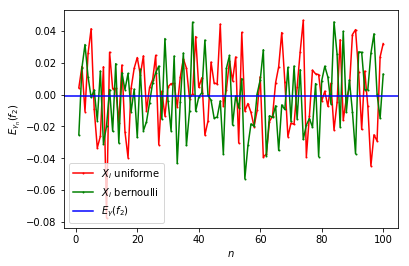

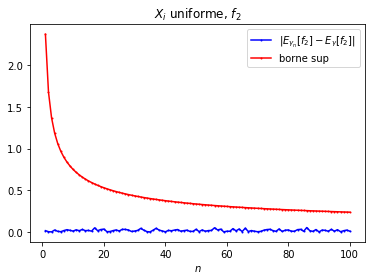

In [3]:
def montecarlo_E_gamma_n(i,n,j): #estimation de E_gamma_n(f) via monte-carlo ou gamma_n suit la loi j
    sum=0
    for k in range(1000):
        sum+=f(i,law_gamma(j,n))
    return sum/1000

def law1_gamma(n):#si les X_n suivent une loi uniforme U[-sqrt(3),sqrt(3)]
    sum=0
    for i in range(n):
        sum+=random.uniform(-math.sqrt(3),math.sqrt(3))
    return sum/math.sqrt(n)
    

def law2_gamma(n):#si les X_n suivent une loi de Bernouilli B(0.5,{-1,1})
    sum=0
    for i in range(n):
        sum+=2*bernoulli(1/2)-1 # +1 ou -1
    return sum/math.sqrt(n)

def law3_gamma(n):# si les X_n suivent une loi de Poisson de parametre 1 P(X=k)=1/(e*(k+1)!) for k>=-1
    sum=0
    for i in range(n):
        sum+=poisson.rvs(1,-1)#offset of -1
    return sum/math.sqrt(n)
#m=E[X_i]=p d'apres S3(a)
p=1/3
q=2/3


def sigma(n):
    sigma_squared = n*p*(1-p) + 2*(n-1)*(1-q)*q*p*p
    return math.sqrt(sigma_squared)

def law4_gamma(n):#on genere un vecteur (x1,..,xn) a partir de yn et zn, puis on calcul la moyenne normalisee
    y=[bernoulli(p) for k in range (n+1)]
    z=[bernoulli(q) for k in range (n)]
    x=[y[0]]+[z[k]*y[k]+(1-z[k])*y[k+1] for k in range(1,n)]
    sum=0
    for k in range(n):
        sum+=x[k]
    return (sum-p*n)/sigma(n)

def law_gamma(j,n):
    if j==1: return law1_gamma(n)
    if j==2: return law2_gamma(n)
    if j==3: return law3_gamma(n)
    if j==4: return law4_gamma(n)

def bound(n,j):
    if j==1:
        c3=3*math.sqrt(3)/4
        c4=9/5
    if j==2:
        c3=0
        c4=1
    if j<=3: return (c3+math.sqrt((2*c4)/math.pi))/math.sqrt(n)
    if j==4:
        D=3
        c3=p
        c4=p
        return (n*D**2*c3/sigma(n)**3)+(math.sqrt(28*c4*n/math.pi)*D**1.5*c4/sigma(n)**2)

def bernoulli(p):
    x=random.uniform(0,1)
    if x<p: return 1
    return 0
#----------------------------------------------------------------------------------------------

N=100#on calcul jusqua E_y_N[F]
i=2

#----------------graphe de E_y[f] et E_y_n[f]------------------------------------------
axe_x=[n for n in range(1,N+1)]
c1=[montecarlo_E_gamma_n(i,n,1)  for n in range(1,N+1)]
c2=[montecarlo_E_gamma_n(i,n,2)  for n in range(1,N+1)]
#c3=[montecarlo_E_gamma_n(i,n,3)  for n in range(1,N+1)]


p1=plt.figure(1)

plt.plot(axe_x,c1, 'ro-',markersize=1,label=r"$X_i$ uniforme")
plt.plot(axe_x,c2, 'go-',markersize=1,label=r"$X_i$ bernoulli")
#plt.plot(axe_x,c3, 'go-',markersize=1,label=r"$X_i$ poisson")
e=montecarlo_E_gamma(i,1000000)
plt.axhline(e,color='b', linestyle='-', label=r"$E_{\gamma}(f_2)$")
plt.xlabel(r"$n$")
plt.ylabel(r"$E_{\gamma_n}(f_2)$")

plt.legend()
plt.show()

#----------------graphe de la borne sup------------------------------------------

M=100#on calcul jusqua E_y_M[F]
axe_x=[n for n in range(1,M+1)]
e=montecarlo_E_gamma(i,1000000)
law=1#pour la loi de numero 1
p1=plt.figure(1)
d=[abs(montecarlo_E_gamma_n(i,n,law)-e) for n in range(1,M+1)]
plt.plot(axe_x,d, 'bo-',markersize=1, label=r"$|E_{\gamma_n}[f_2]-E_{\gamma}[f_2]|$")
bound=[bound(n,law) for n in range(1,M+1)]
plt.plot(axe_x,bound, 'ro-',markersize=1, label="borne sup")
plt.xlabel(r"$n$")
plt.title(r"$X_i$ uniforme, $f_2$")
plt.legend()
plt.show()

# S3
## (a)
Forcément un des termes de la somme est nul car $ Z_n $ ne prend qu'une valeur ($1$ ou $0$).De plus $X_n$ prend clairement uniquement les deux valeurs $1$,$0$ et :
$ \mathbb{P}(X_n = 1) = \mathbb{P}(Y_n =1,Z_n=1) + \mathbb{P}(Z_n=0,Y_{n+1}=1))= pq + (1-q)p = p $
et donc $X_n \approx Be(p) $
## (b)
Si $|i-j|>1$ les $X_i$ est fonction de $Z_i,_Yi,Y_{i+1}$ et $X_j$ est fonction de $Z_j,Y_j,Y_{j+1}$ or ce sont deux ensembles de variables alétoires mutuellement indépendantes (car $Y_i,Y_{i+1},Y_j, Y_{j+1}$ sont des termes distincts de la suite $Y_n$). D'autre part si on suppose que $X_i,X_j$ indépendantes et par absurde que $|i-j|<=1$ alors :
si $i=j$ cela est faux étant donné que $ \mathbb{P}({X_n}^2 =1) = 1$ or $\mathbb{P}(X_n=1)P(X_n=1)=p^2$ (Notez que ce raisonnement ne tiens en place que si $p<1$...)
Si $j=i+1$ calculons : $\mathbb{P}(X_i=1,X_{i+1}=0)$
on a :
$$\mathbb{P}(X_i=1,X_{i+1}=0)=\mathbb{P}(X_i=1,X_{i+1}=0,Y_{i+1}=0)+\mathbb{P}(X_i=1,X_{i+1}=0,Y_{i+1}=1) =A +B$$
or:
\begin{align*}
A& = \mathbb{P}(Z_i=1,Y_i=1,X_{i+1}=0,Y_{i+1}=0)\\
A& = \mathbb{P}(Z_i=1,Y_i=1,Z_{i+1},Y_{i+1}=0)+P(Z_i=1,Y_i=1,Z_{i+1},Y_{i+2},Y_{i+1}=0)\\
A&= q^2p(1-p)+ q(1-q)p(1-p^2) 
\end{align*}
et
\begin{align*}
B&= \mathbb{P}(X_i=1,X_{i+1}=0,Y_{i+1}=1)\\ 
B&= \mathbb{P}(X_i=1,Z_i=1,X_{i+1}=0,Y_{i+1}=1) +P(X_i=1,Z_i=0,X_{i+1}=0,Y_{i+1}=1)\\ 
B&= \mathbb{P}(Y_i=1,Z_i=1,X_{i+1}=0,Y_{i+1}=1) + P(Z_i=0,X_{i+1}=0,Y_{i+1}=0)\\
B&= \mathbb{P}(Y_i=1,Z_i=1,Z_{i+1}=0,Y_{i+2}=0,Y_{i+1}=1)+P(Z_i=0,Z_{i+1}=0,Y_{i+2}=0,Y_{i+1}=1)\\ 
B&= pq(1-q)(1-p)p + (1-q)(1-q)(1-p)
\end{align*}

finalement:

$$A+B = q^2p(1-p)+qp(1-q)(1-p)^2+qp^2(1-q)(1-p)+p(1-q)^2(1-p)$$ <br/>
après simplification: $$ A+B = p(1-p)(1-q+q^2) $$
mais $$\mathbb{P}(X_i=1)\mathbb{P}(X_{i+1}=0)=p(1-p)$$ <br/>Si $0<q<1$ alors les variables $X_i,X_{i+1}$ sont indépendantes. Il reste à traiter le cas $q = 0$ou $q=1$ cependant on aura que $X_n = Y_n$ p.s ou $X_n = Y_{n+1}$ p.s, qui sont des v.a.r indépendantes...il faut donc imposer à $q$ de ne pas prendre les deux valeurs critiques $1,0$ 
## (c)
On a $$\mathbb{Cov}(X_n,X_{n+1})= \mathbb{E}[X_n X_{n+1}]-\mathbb{E}[X_n]\mathbb{E}[X_{n+1}]$$
or : $$\mathbb{E}[X_n]=\mathbb{E}[X_{n+1}]=p$$
et avec le meme calcul fait en (b) on trouve que:
$$\mathbb{E}[X_n X_{n+1}]=P(X_n=1,X_{n+1}=1)=p^2(1+q-q^2)$$
d'où le resultat.
Calculons maintenant $\sigma_n ^2$ <br/>
on a (sachant que $m=p$ ici):
\begin{align*}
\sigma_n^2 &= \mathbb{VAR}(\Sigma X_i)\\
&= \Sigma \mathbb{VAR}(X_i) + \Sigma_{i\neq j} \mathbb{COV}(X_i,X_j)\\
&= n\mathbb{VAR}(X_i)+2(n-1)\mathbb{COV}(X_i,X_{i+1})\\
&= n\mathbb{VAR}(X_i)+2(n-1)(1-q)qp^2\\
&= np(1-p) + 2(n-1)(1-q)qp^2
\end{align*}

donc :

$$\sigma_n =\sqrt{np(1-p) + 2(n-1)(1-q)qp^2}$$



# S4

On n'a qu'à écrire une nouvelle fonction law4_gamma(n) qui génére la loi du vecteur $(X_1,...,X_n)$. On la déjà écrite dans le code de S2. Malheureusement, générer des variables suivants cette loi se fait en $O(n)$, donc le calcul de $E_{\gamma_n}[f]$ prend maintenant plusieurs minutes. 

Ainsi on s'est limité aux fonctions $f_1$ et $f_2$ et $n<150$, ce qui permet de voir le début de la convergence, et que la borne est (presque) satisfaite. 

Voici le code pour générer d'abord le graphe de $E_{\gamma}[f]$ et $E_{\gamma_n}[f]$ et ensuite le graphe comparant  $|E_{gamma_n}[f_1]-E_{gamma}[f_1]|$ et sa borne superieure. 


In [ ]:
N=100 #on calcul jusqua E_y_N[F]
i=2 #numero de la fonction f_i

def bound(n,j):
    if j==1:
        c3=3*math.sqrt(3)/4
        c4=9/5
    if j==2:
        c3=0
        c4=1
    if j<=3: return (c3+math.sqrt((2*c4)/math.pi))/math.sqrt(n)
    if j==4:
        D=3
        c3=p
        c4=p
        return (n*D**2*c3/sigma(n)**3)+(math.sqrt(28*c4*n/math.pi)*D**1.5*c4/sigma(n)**2)

#----------------graphe de E_y[f] et E_y_n[f]------------------------------------------

axe_x=[n for n in range(1,N+1)]
c4=[montecarlo_E_gamma_n(i,n,4)  for n in range(1,N+1)]
e=montecarlo_E_gamma(i,1000000)

p1=plt.figure(1)

plt.plot(axe_x,c4, 'go-',markersize=1,label=r"$X_i$ S3")

plt.axhline(e,color='b', linestyle='-', label=r"$E_{\gamma}(f_2)$")
plt.xlabel(r"$n$")
plt.ylabel(r"$E_{\gamma_n}(f_2)$")

plt.legend()
plt.show()

#----------graphe de la borne sup--------------------------------------
M=100
axe_x=[n for n in range(1,M+1)]
e=montecarlo_E_gamma(i,1000000)
law=4
p1=plt.figure(1)
d=[abs(montecarlo_E_gamma_n(i,n,law)-e) for n in range(1,M+1)]#law1
plt.plot(axe_x,d, 'bo-',markersize=1, label=r"$|E_{\gamma_n}[f_1]-E_{\gamma}[f_1]|$")
bound=[bound(n,law) for n in range(1,M+1)]
plt.plot(axe_x,bound, 'ro-',markersize=1, label="borne sup")
plt.xlabel(r"$n$")
plt.title(r"$X_i$ uniforme, $f_1$")
plt.legend()
plt.show()